# Higher-Order Derivatives, Systems of ODEs

Our implementation of RK4 supports systems of ODEs, that is, problems with vector-valued solutions $y(t)$. This can also be used to solve scalar-valued equations with higher-order derivatives. Consider e.g. the motion of a pendulum, with an angle $\theta$ from the vertical axis and normalized physical constants:

$$
\theta''(t) + \sin \theta(t) = 0
$$

To write this as a system of first-order equations, we introduce the first derivative $\theta'(t)$ as a new unknown and solve for the vector-valued function $y(t) = (\theta(t), \theta'(t))$. The corresponding right-hand side in the system of equations then becomes

$$
y'(t) = f(t, y(t)) =
\begin{pmatrix}
\theta'(t) \\
-\sin \theta(t)
\end{pmatrix}
$$

This is implemented below, and solved for an initial condition $y(0) = (\theta(0), \theta'(0)) = (2.5,0)$ using a step size of $h=0.1$ up to time $T=10$:

In [1]:
using PyPlot, PyCall

function rk4(f, y0, h, N, t0=0)
    t = t0 .+ h*(0:N)
    y = zeros(N+1, length(y0))
    
    y[1,:] .= y0
    for n = 1:N
        k1 = h * f(t[n], y[n,:])
        k2 = h * f(t[n] + h/2, y[n,:] + k1/2)
        k3 = h * f(t[n] + h/2, y[n,:] + k2/2)
        k4 = h * f(t[n] + h, y[n,:] + k3)
        y[n+1,:] = y[n,:] + (k1 + 2k2 + 2k3 + k4) / 6
    end
    
    return t,y
end

rk4 (generic function with 2 methods)

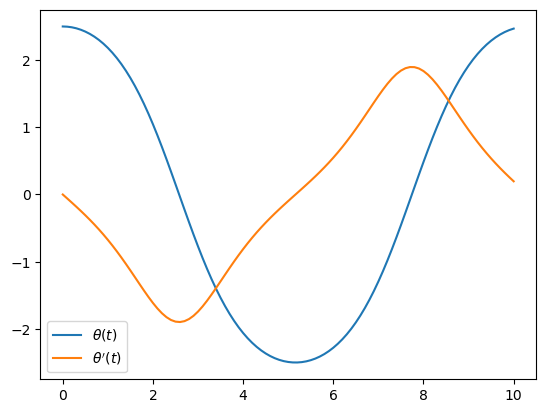

In [2]:
f(t,y) = [y[2], -sin(y[1])]
y0 = [2.5, 0]
h = 0.1
T = 10
t,y = rk4(f, y0, h, round(Int, T/h))
plot(t,y)
legend(("\$\\theta(t)\$", "\$\\theta'(t)\$"));

The motion of the pendulum can also be animated:

In [3]:
animation = pyimport("matplotlib.animation");
fig, ax = subplots(figsize=(5,5))
function update(frame)
    θ = y[frame+1,1]
    ax.clear()
    ax.plot([0,sin(θ)], [0,-cos(θ)], linewidth=2)
    ax.add_artist(matplotlib.patches.Circle([sin(θ),-cos(θ)], 0.1))
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
end
ani = animation.FuncAnimation(fig, update, frames=length(t), interval=50)
close(ani._fig)
@pyimport IPython.display as d
d.HTML(ani.to_jshtml())

PyObject <IPython.core.display.HTML object>